# **WOW Project Proposal: Binary Classification of Machine Failures**

By: Kelsey Tang and Carly Craffen

# Understanding the Dataset

## **Goal**

Our goal is to predict machine failure probability using sensor data. Specifically, we plan to create a model that accurately forecasts failures, assisting in proactive maintenance to avoid breakdowns.

Our dataset includes machine parameters such as temperature, speed, and torque, alongside indicators for different failure types. And we decide to use machine learning techniques, including deep learning, to build models. The challenge involves balancing model accuracy and generalization. By understanding failure modes, we also seeks to develop models that not only perform well on training data but also effectively predict failures in real-world scenarios, minimizing downtime and maximizing machine efficiency.

## **BLUF**
Logistic Regression appears to be the best model in predicting machine failure. Random Forest and Gradient Boosting models also demonstrated high accuracy and precision in predicting instances of no failure, with relatively good performance in identifying instances of failure. However, feature engineering had varying impacts across models, with marginal improvements observed in Random Forest but a decline in performance in Gradient Boosting and Logistic Regression. Additionally, Lime Analysis reveals specific influential factors on predictions, such as "Energy_J" and "id", while ATE analysis highlights the significance of temperature and failure triggers in predicting machine failures.

## **Data**

**Data Source**: https://www.kaggle.com/competitions/playground-series-s3e17/data

**Dataset Description**

The dataset comprises of the following features:

- Machine failure: Target variable, it's a binary indicator specifying whether the machine failed (1) or not (0).

- ID: This is a unique identifier assigned to each record in the dataset. It helps in indexing and referencing each individual record.

- Product Id: Combination of Type variable followed by a identifier number

- Type: This refers to the type of machine for which the readings are recorded. Understanding the type of machine can provide insight into the kind of operations it performs, which can in turn be linked to the probability of failure.

- Air temperature [K]: This is the ambient temperature around the machine, measured in Kelvin. It could be an important factor as machines might behave differently under different ambient temperatures.

- Process temperature [K]: This represents the temperature of the process in which the machine is engaged, also measured in Kelvin. Certain processes might cause the machine to heat up and thus increase the chances of failure.

- Rotational speed [rpm]: This is the speed at which the machine operates. It is measured in rotations per minute (rpm). Higher speeds could potentially lead to increased wear and tear.

- Torque [Nm]: This is a measure of the force that causes the machine to rotate. High torque might indicate high load on the machine, which could increase the likelihood of failure.

- Tool wear [min]: This feature indicates the degree of wear and tear the machine has undergone. This is measured in minutes and high tool wear might indicate that the machine is due for maintenance.

- TWF: Tool wear failure. This indicates whether the machine failed due to tool wear.
- HDF: Heat dissipation failure. This indicates whether the machine failed due to an inability to dissipate heat.
- PWF: Power failure. This indicates whether the machine failed due to a power problem.
- OSF: Overstrain failure. This indicates whether the machine failed due to being overstrained.
- RNF: Random failure. This indicates whether the machine failed due to a random, unspecified issue.



# Import the packages

In [5]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
from pycaret.datasets import get_data
from pycaret.classification import *

ImportError: cannot import name '_Scorer' from 'sklearn.metrics._scorer' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py)

# Import the Data and Fix Column Names

In [2]:
# Read training datasets
df = pd.read_csv('/content/machine_failure_train.csv')

def clean_column_names(df):
    df.columns = df.columns.str.replace('[', '')
    df.columns = df.columns.str.replace(']', '')
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.replace(':', '')
    return df

df = clean_column_names(df)

# Data Cleaning

## Duplicates

In [4]:
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 0


Since both training and testing datasets have a high number of duplicates, we decided to remove those duplicated observations.

In [3]:
df = df.drop_duplicates()
print('\nDuplicates\n', df.duplicated().sum())


Duplicates
 0


## Missing Values

In [5]:
# Checks
# Check data types
print(df.info())

# Check for missing values
print('\n\nMissing Values for Train Dataset\n',df.isnull().sum(axis=0))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     136429 non-null  int64  
 1   Product_ID             136429 non-null  object 
 2   Type                   136429 non-null  object 
 3   Air_temperature_K      136429 non-null  float64
 4   Process_temperature_K  136429 non-null  float64
 5   Rotational_speed_rpm   136429 non-null  int64  
 6   Torque_Nm              136429 non-null  float64
 7   Tool_wear_min          136429 non-null  int64  
 8   Machine_failure        136429 non-null  int64  
 9   TWF                    136429 non-null  int64  
 10  HDF                    136429 non-null  int64  
 11  PWF                    136429 non-null  int64  
 12  OSF                    136429 non-null  int64  
 13  RNF                    136429 non-null  int64  
dtypes: float64(3), int64(9), object(2)
m

It shows that there are no missing values in this dataset.

## Remove outliers

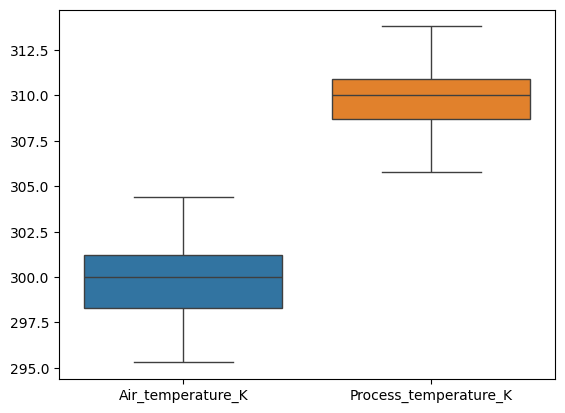

In [6]:
# Outlier detection example: Detect outliers using boxplot and remove them
# Plot boxplot
sns.boxplot(data=df[['Air_temperature_K', 'Process_temperature_K']])
plt.show()

# Remove outliers based on boxplot results
Q1 = df['Air_temperature_K'].quantile(0.25)
Q3 = df['Air_temperature_K'].quantile(0.75)
IQR = Q3 - Q1
X_train = df[(df['Air_temperature_K'] >= Q1 - 1.5 * IQR) & (df['Air_temperature_K'] <= Q3 + 1.5 * IQR)]


## Describe the Data

In [7]:
# Shape of the data
print('Shape of the training data: ', df.shape)

Shape of the training data:  (136429, 14)


In [8]:
df.describe()

id  Air_temperature_K  Process_temperature_K  \
count  136429.000000      136429.000000          136429.000000   
mean    68214.000000         299.862776             309.941070   
std     39383.804275           1.862247               1.385173   
min         0.000000         295.300000             305.800000   
25%     34107.000000         298.300000             308.700000   
50%     68214.000000         300.000000             310.000000   
75%    102321.000000         301.200000             310.900000   
max    136428.000000         304.400000             313.800000   

       Rotational_speed_rpm      Torque_Nm  Tool_wear_min  Machine_failure  \
count         136429.000000  136429.000000  136429.000000    136429.000000   
mean            1520.331110      40.348643     104.408901         0.015744   
std              138.736632       8.502229      63.965040         0.124486   
min             1181.000000       3.800000       0.000000         0.000000   
25%             1432.000000      34.600000      48.000000         0.000000   
50%             1493.000000      40.400000     106.000000         0.000000   
75%             1580.000000      46.100000     159.000000         0.000000   
max             2886.000000      76.600000     253.000000         1.000000   

                 TWF            HDF            PWF            OSF  \
count  136429.000000  136429.000000  136429.000000  136429.000000   
mean        0.001554       0.005160       0.002397       0.003958   
std         0.039389       0.071649       0.048899       0.062789   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                 RNF  
count  136429.000000  
mean        0.002258  
std         0.047461  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

## Cleaning the Columns

### Fix "Product_ID"

After reviewing the dataset, we discovered that there is an additional column called "Product_ID". We at first thought that it includes only unique variables. However, we discovered that there are only 9,976 unique values in that column whereas our dataset size is 136,429 observations

In [8]:
df["Product_ID"].nunique()

9976

After reviewing the datasets, each product_id includes a letter in the beginning even though there is a column called "type". In the next cell, we will remove the first letter from "product_id".

In [9]:
df['Product_ID'] = df['Product_ID'].str.slice(start=1)

In [10]:
df.head()

id Product_ID Type  Air_temperature_K  Process_temperature_K  \
0   0      50096    L              300.6                  309.6   
1   1      20343    M              302.6                  312.1   
2   2      49454    L              299.3                  308.5   
3   3      53355    L              301.0                  310.9   
4   4      24050    M              298.0                  309.0   

   Rotational_speed_rpm  Torque_Nm  Tool_wear_min  Machine_failure  TWF  HDF  \
0                  1596       36.1            140                0    0    0   
1                  1759       29.1            200                0    0    0   
2                  1805       26.5             25                0    0    0   
3                  1524       44.3            197                0    0    0   
4                  1641       35.4             34                0    0    0   

   PWF  OSF  RNF  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

### Label Encoding for the "Type" Column

In [11]:
# OHE of Type feature of df
df = pd.concat([df, pd.get_dummies(df['Type'], prefix='Type').astype(int)], axis=1)
df = df.drop(columns=['Type'])

## Check for Data Imbalance

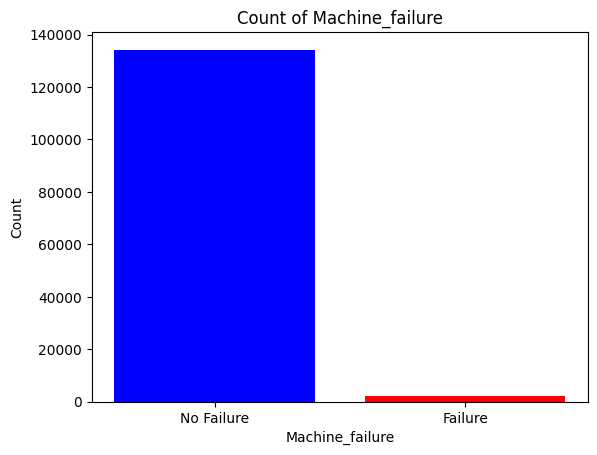

In [12]:
# count target to check dataset balance

target_counts = df['Machine_failure'].value_counts()

# Plotting
plt.bar(target_counts.index, target_counts.values, color=['blue', 'red'])
plt.xlabel('Machine_failure')
plt.ylabel('Count')
plt.title('Count of Machine_failure')
plt.xticks(target_counts.index, ['No Failure', 'Failure'])
plt.show()

### Reviewing the Occurences of Machine Failure

In [13]:
target_col = 'Machine_failure'

num_cols = ['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm','Tool_wear_min'
]
binary_cols = ['TWF', 'HDF','PWF','OSF','RNF']
cat_cols = 'Type'
cat_columns = ['Type']

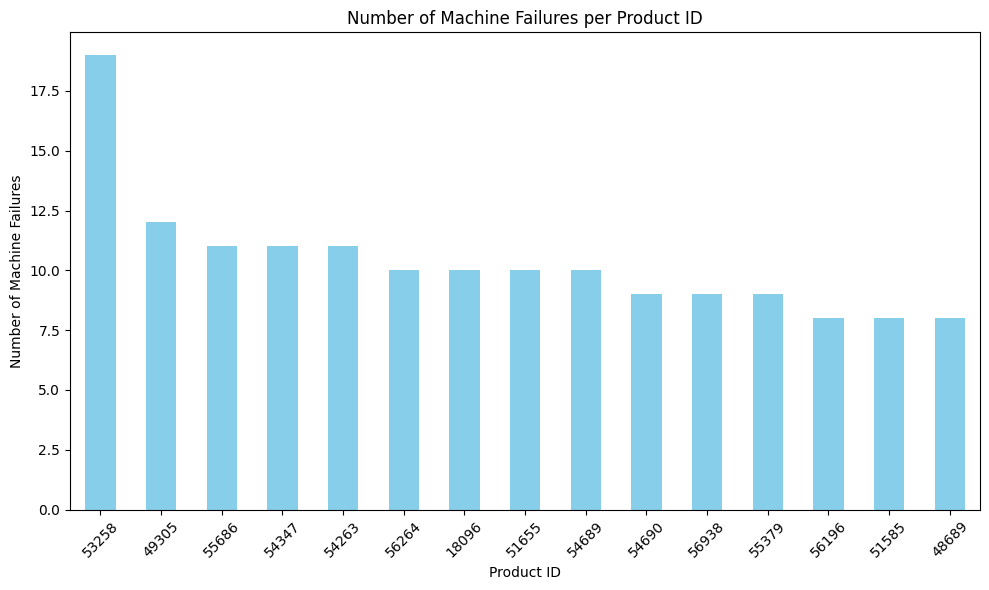

In [14]:
filtered_Machine_failures = df[(df[target_col] == 1)]
product_id_MF = filtered_Machine_failures.Product_ID.value_counts()

# Select top 15 product IDs
top_15_product_counts = product_id_MF.head(15)

plt.figure(figsize=(10, 6))
top_15_product_counts.plot(kind='bar', color="skyblue")
plt.title('Number of Machine Failures per Product ID')
plt.xlabel('Product ID')
plt.ylabel('Number of Machine Failures')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Machine Failures based on Failure Modes

In [15]:
# this shows that some machine failures occurred even when one of the failure modes (binary) did not trigger.
filtered_df = df[(df[target_col] == 1) & (df[binary_cols].sum(axis=1) == 0)]

d_columns = binary_cols + [target_col]
filtered_df = filtered_df[d_columns]

print(f'The total number of machine failures that occurred without triggering any failure modes: {filtered_df.Machine_failure.count()}.')

The total number of machine failures that occurred without triggering any failure modes: 507.


# Exploratory Data Analysis

## Individual Boxplots

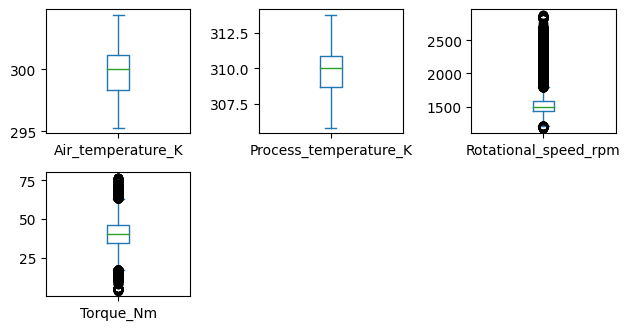

In [14]:
# Individuals boxplot for each feature of the training data without id column
df.iloc[:,1:6].plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = (14, 14)
plt.tight_layout()
plt.show()

## Density Functions

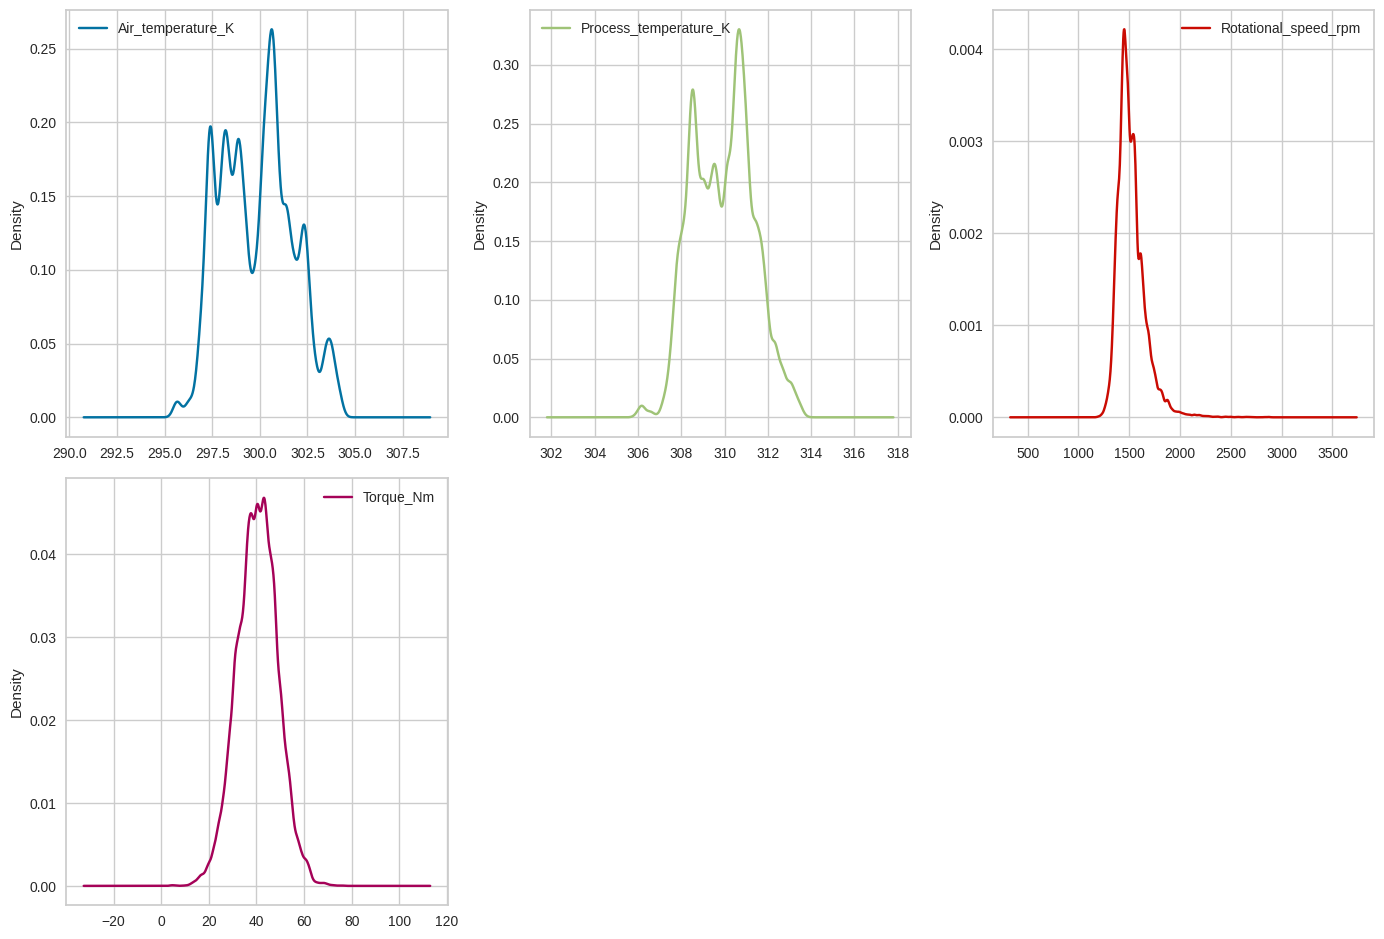

In [ ]:
# Density function for each feature of the training data without id column
df.iloc[:,1:6].plot(kind='density', subplots=True, layout=(3, 3), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = (14, 14)
plt.tight_layout()
plt.show()

## Univariate Descriptive Statistics

In [ ]:
# Ensure the maximum number of columns are displayed in pandas
pd.set_option('display.max_columns', None)

# Univariate numerical statistics using pandas .describe
print("UNIVARIATE DESCRIPTIVE STAT using pandas\n",df.describe(include='all').T)
print("\n SKEWNESS\n",df.skew())
print("\n FISHER'S KURTOSIS\n",df.kurt())

UNIVARIATE DESCRIPTIVE STAT using pandas
                           count unique    top freq        mean           std  \
id                     136429.0    NaN    NaN  NaN     68214.0  39383.804275   
Product_ID               136429   9976  53257  139         NaN           NaN   
Air_temperature_K      136429.0    NaN    NaN  NaN  299.862776      1.862247   
Process_temperature_K  136429.0    NaN    NaN  NaN   309.94107      1.385173   
Rotational_speed_rpm   136429.0    NaN    NaN  NaN  1520.33111    138.736632   
Torque_Nm              136429.0    NaN    NaN  NaN   40.348643      8.502229   
Tool_wear_min          136429.0    NaN    NaN  NaN  104.408901      63.96504   
Machine_failure        136429.0    NaN    NaN  NaN    0.015744      0.124486   
TWF                    136429.0    NaN    NaN  NaN    0.001554      0.039389   
HDF                    136429.0    NaN    NaN  NaN     0.00516      0.071649   
PWF                    136429.0    NaN    NaN  NaN    0.002397      0.048899  

## Correlation Matrix

CORRELATION MATRIX
                              id  Product_ID  Air_temperature_K  \
id                     1.000000    0.002670          -0.005338   
Product_ID             0.002670    1.000000           0.001527   
Air_temperature_K     -0.005338    0.001527           1.000000   
Process_temperature_K -0.002396    0.057608           0.856080   
Rotational_speed_rpm   0.004419    0.000082           0.016545   
Torque_Nm             -0.001968   -0.000096          -0.006773   
Tool_wear_min         -0.001790   -0.007428           0.016994   
Machine_failure        0.001500    0.007609           0.067744   
TWF                   -0.000475   -0.001464           0.003826   
HDF                   -0.000680   -0.008651           0.100454   
PWF                    0.003275   -0.004010           0.007967   
OSF                    0.002114    0.026689           0.007842   
RNF                    0.000175   -0.002023           0.004815   
Type_H                -0.004239   -0.166162          -0.

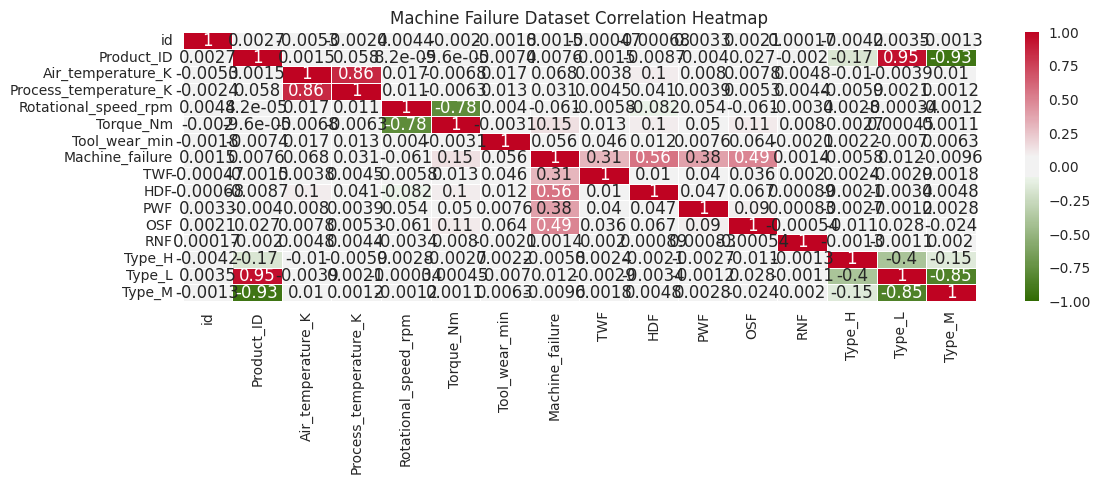

In [ ]:
#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr(method='pearson', min_periods=1))
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (12,5))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True)
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Machine Failure Dataset Correlation Heatmap")
plt.tight_layout()
plt.show()

Based on the correlation matrix above, we can see that the highest correlations are:
- Air_Temperature_K and Process_temperature_K: 0.86
- Type_L and Product_ID: 0.95
- Machine_Failure and HDF: 0.56
- OSF and Machine_Failure: 0.49

The lowest, negative correlations are:
- Product_ID and Type M: -0.93
- Type_M and Type_L: -0.85
- Torque_NM and Rotational_speed_rpm: -0.78

## Matrix of Scatter and Histograms for the Numerical Features

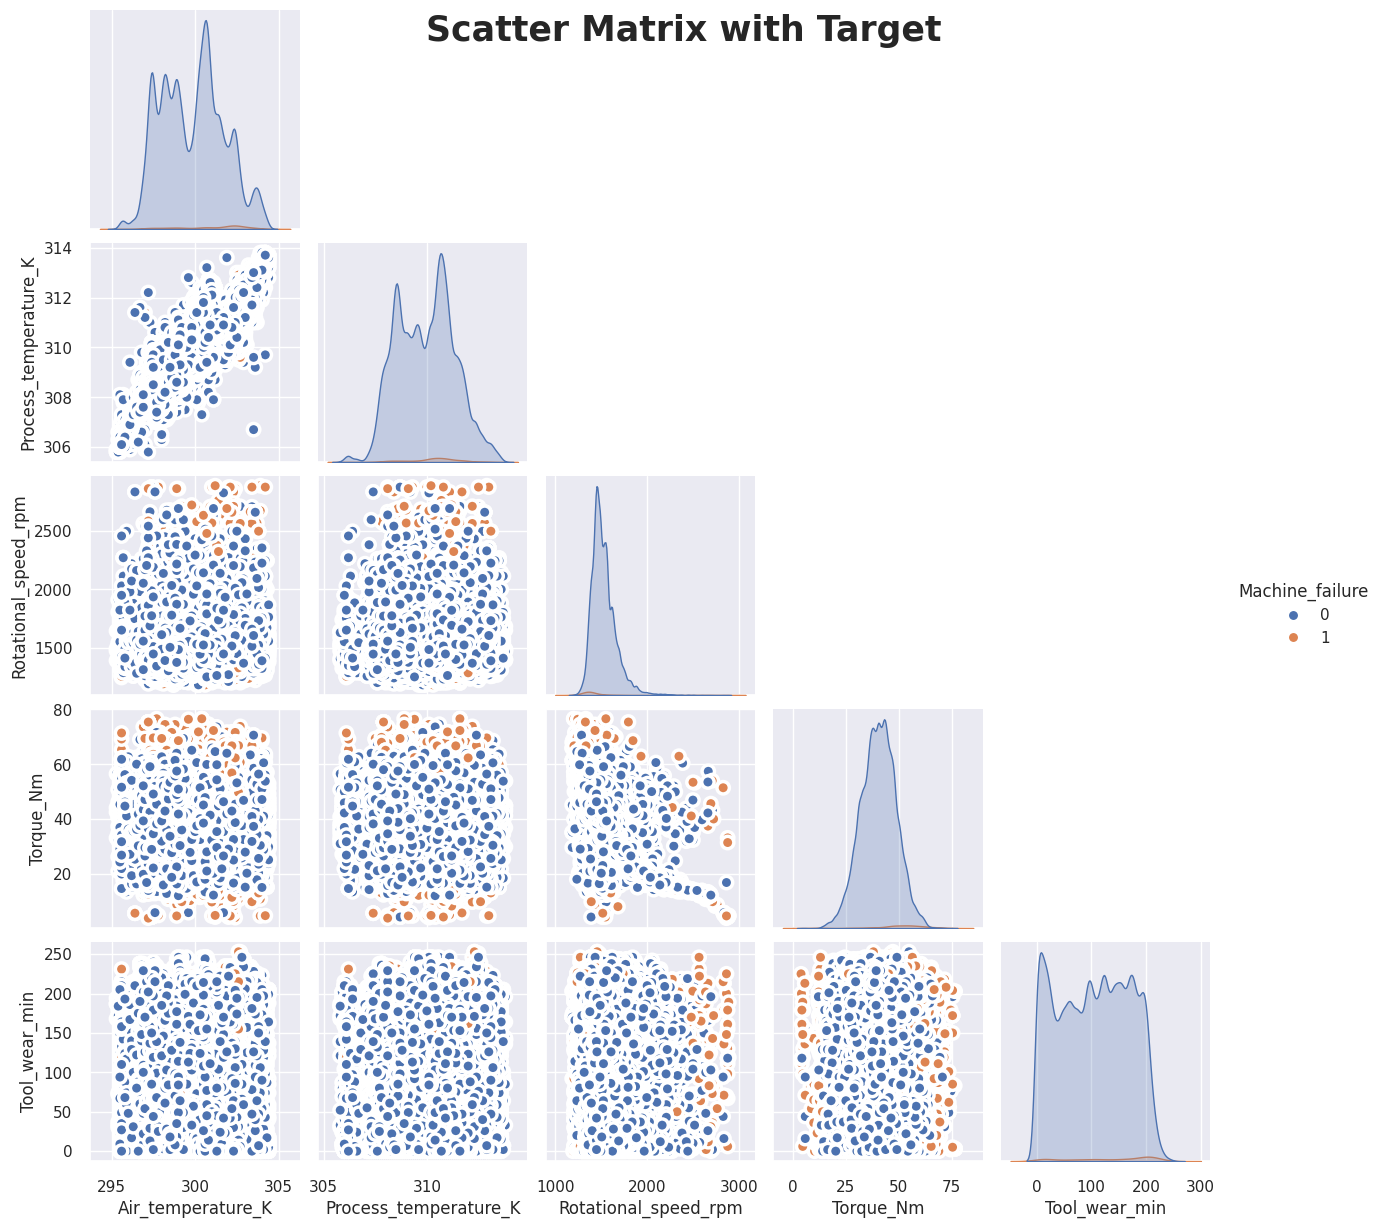

In [ ]:
# matrix of scatter and histograms for each numerical feature of the training data
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme
sns.set_theme(style="darkgrid")

# Selecting numerical columns excluding binary columns
num_cols = ['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min']

# Create pairplot
sns.pairplot(data=df, vars = num_cols, corner=True, hue='Machine_failure', plot_kws={'s': 80, 'edgecolor': "white", 'linewidth': 2.5})

# Set title
plt.suptitle(f'Scatter Matrix with Target\n\n', ha='center', fontweight='bold', fontsize=25, y=0.98)

# Show plot
plt.show()


## Hierarchical Clustering

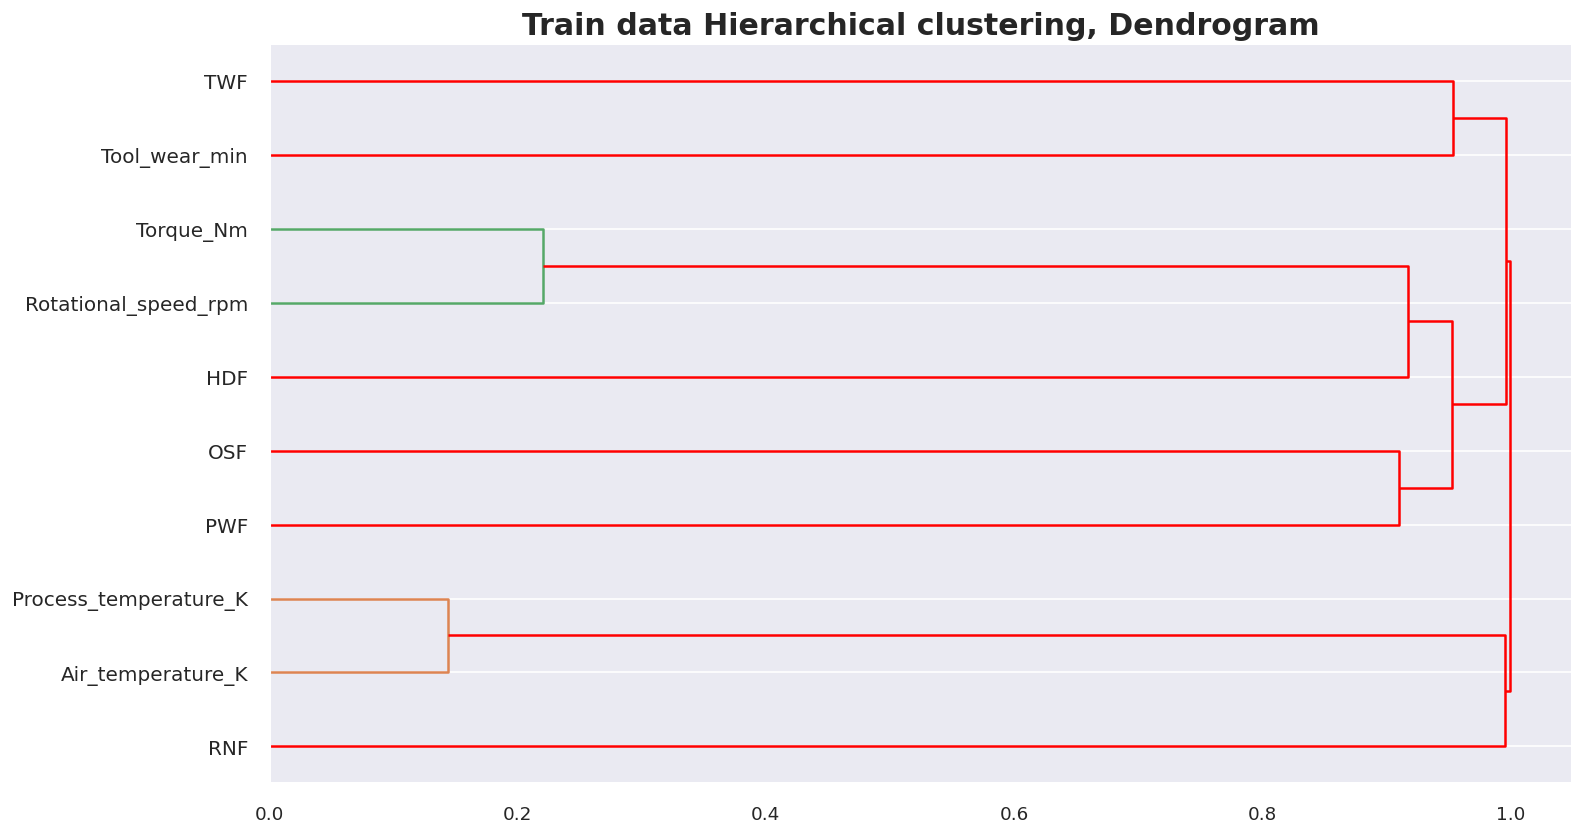

In [ ]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

def hierarchical_clustering(data, title):
    fig, ax = plt.subplots(1, 1, figsize=(14, 8), dpi=120)
    correlations = data.corr()
    converted_corr = 1 - np.abs(correlations)
    Z = linkage(squareform(converted_corr), 'complete')

    dn = dendrogram(Z, labels=data.columns, ax=ax, above_threshold_color='#ff0000', orientation='right')
    hierarchy.set_link_color_palette(None)
    plt.grid(axis='x')
    plt.title(f'{title} Hierarchical clustering, Dendrogram', fontsize=18, fontweight='bold')
    plt.show()

hierarchical_clustering(df[num_cols+binary_cols], title='Train data')

# Feature Engineering

## Add in New Features

In [15]:
df_FE = df.copy()

In [16]:
def feature_engineering(data):
    data['RelationTemperature'] = data['Air_temperature_K'] / data['Process_temperature_K']
    data['TorqueRPM'] = data['Torque_Nm'] / data['Rotational_speed_rpm']
    data['WearRPM'] = data['Tool_wear_min'] / data['Rotational_speed_rpm']
    data['ToolWearTorque'] = data['Tool_wear_min'] / data['Torque_Nm']

    for col in ['Torque_Nm', 'Tool_wear_min', 'Rotational_speed_rpm']:
        data[f'{col}_B'] = pd.cut(df[col], bins=20)
        data[f'{col}_B'] = data[f'{col}_B'].cat.codes + 1

    data['TotalF'] = data['TWF'] + data['HDF'] + data['PWF'] + data['OSF']

    Angular_velocity = data['Rotational_speed_rpm'] * 2 * np.pi / 60

    data['Power_W'] = data['Torque_Nm'] * Angular_velocity

    data['Energy_J'] = data['Power_W'] * data['Tool_wear_min'] *60

    return data

df_FE = feature_engineering(df_FE)

In [17]:
df_FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      136429 non-null  int64  
 1   Product_ID              136429 non-null  object 
 2   Air_temperature_K       136429 non-null  float64
 3   Process_temperature_K   136429 non-null  float64
 4   Rotational_speed_rpm    136429 non-null  int64  
 5   Torque_Nm               136429 non-null  float64
 6   Tool_wear_min           136429 non-null  int64  
 7   Machine_failure         136429 non-null  int64  
 8   TWF                     136429 non-null  int64  
 9   HDF                     136429 non-null  int64  
 10  PWF                     136429 non-null  int64  
 11  OSF                     136429 non-null  int64  
 12  RNF                     136429 non-null  int64  
 13  Type_H                  136429 non-null  int64  
 14  Type_L              

## Correlation Matrix of New Features

CORRELATION MATRIX
                               id  Product_ID  Air_temperature_K  \
id                      1.000000    0.002670          -0.005338   
Product_ID              0.002670    1.000000           0.001527   
Air_temperature_K      -0.005338    0.001527           1.000000   
Process_temperature_K  -0.002396    0.057608           0.856080   
Rotational_speed_rpm    0.004419    0.000082           0.016545   
Torque_Nm              -0.001968   -0.000096          -0.006773   
Tool_wear_min          -0.001790   -0.007428           0.016994   
Machine_failure         0.001500    0.007609           0.067744   
TWF                    -0.000475   -0.001464           0.003826   
HDF                    -0.000680   -0.008651           0.100454   
PWF                     0.003275   -0.004010           0.007967   
OSF                     0.002114    0.026689           0.007842   
RNF                     0.000175   -0.002023           0.004815   
Type_H                 -0.004239   -0.1661

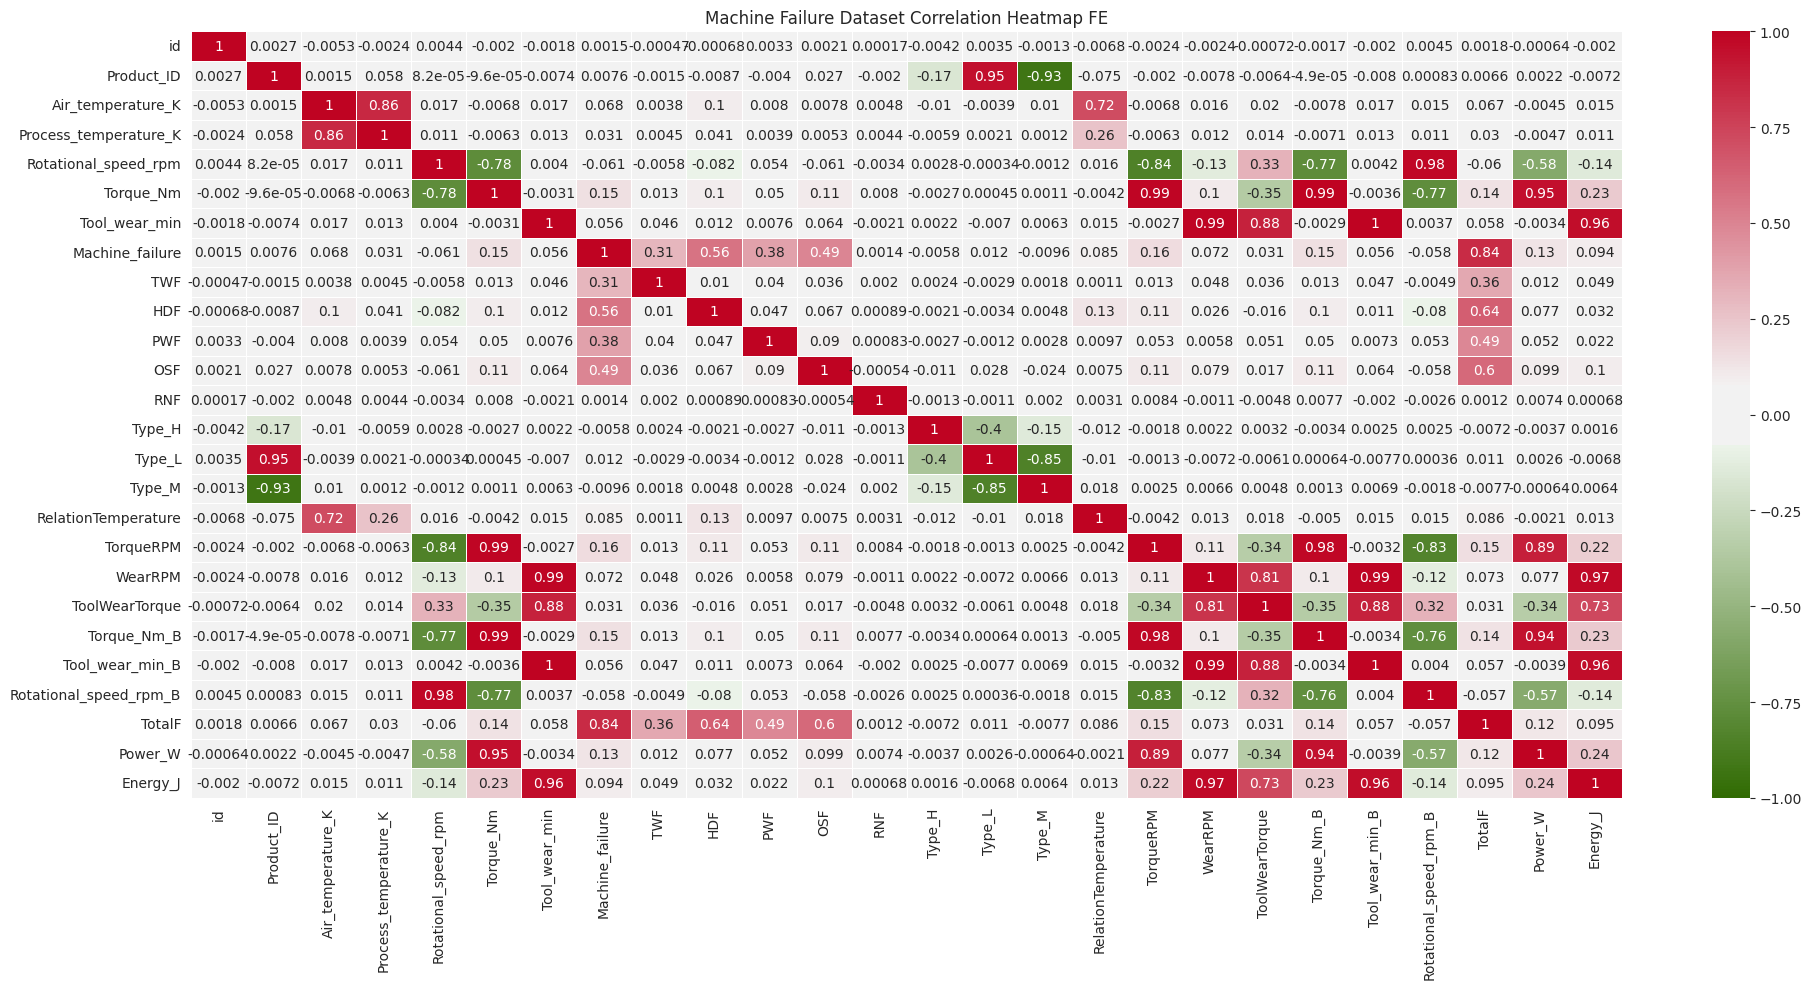

In [18]:
# Multivariate numerical descriptive statistics
#Correlation Matrix
print("CORRELATION MATRIX\n",df_FE.corr(method='pearson', min_periods=1))
print("\n\n")
#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (20,10))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True)
sns.heatmap((df_FE).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Machine Failure Dataset Correlation Heatmap FE")
plt.tight_layout()
plt.show()

# **PyCaret Low Code**

In [ ]:
# ADJUST normalize, fix_imbalance AND fold TO TURN STANDARDIZATION, BALANCE AND CROSS-VALIDATION ON/OFF
# THE MINIMUM VALUE OF fold is 2 (THERE IS NO WAY TO USE THIS CODE TO EVALUATE PYCARET ON THE HOLDOUT SAMPLE ONLY)
clf_setup = setup(data=df,
                  train_size = 0.7,
                  target='Machine_failure',
                  # normalize=True,
                  fix_imbalance=True,
                  session_id=42, fold=2)


# Compare models to choose the best one
best_model = compare_models()

# Create a model; here, we use the best model found by compare_models
# For example, if Logistic Regression was the best: model = create_model('lr')
model = create_model(best_model)

# Tune the model for better performance (optional)
tuned_model = tune_model(model)

# Finalize the model (trains on the whole dataset)
final_model = finalize_model(tuned_model)

# Predict on the test set
predict_model(final_model);

# Display the accuracy and confusion matrix
evaluate_model(final_model)


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Random Forest

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into features (X) and target variable (y)
X = df.drop(['Machine_failure'], axis=1)
y = df['Machine_failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9960419262625523
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.98      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286

Confusion Matrix:
[[26842     6]
 [  102   336]]


### Feature Importance of the Random Forest Model

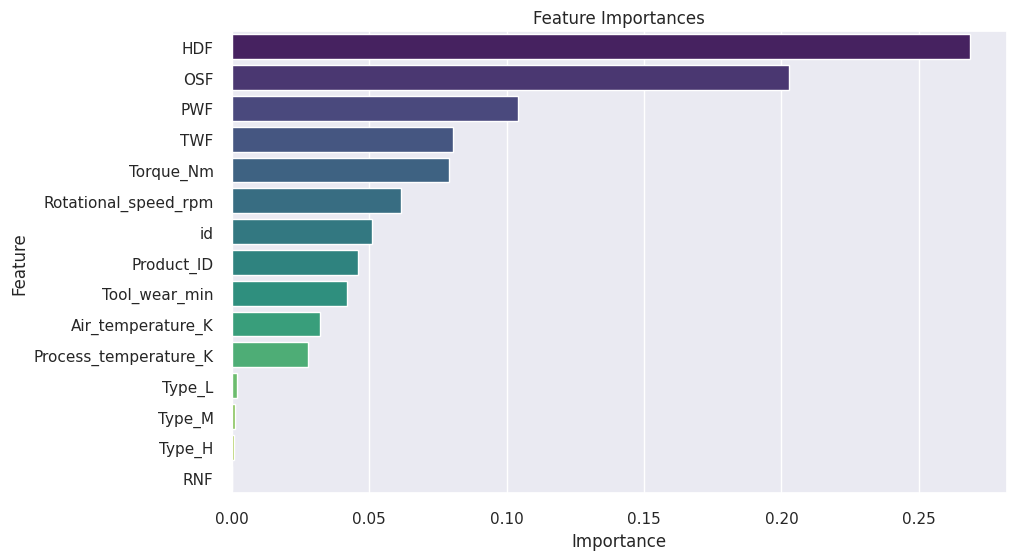

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
feature_importances = rf_clf.feature_importances_

# Get column names as feature labels
feature_labels = X.columns

# Create a DataFrame to store feature importances with corresponding labels
feature_importance_df = pd.DataFrame({'Feature': feature_labels, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### ROC Curve of the Random Forest Model

<Figure size 1400x1400 with 0 Axes>

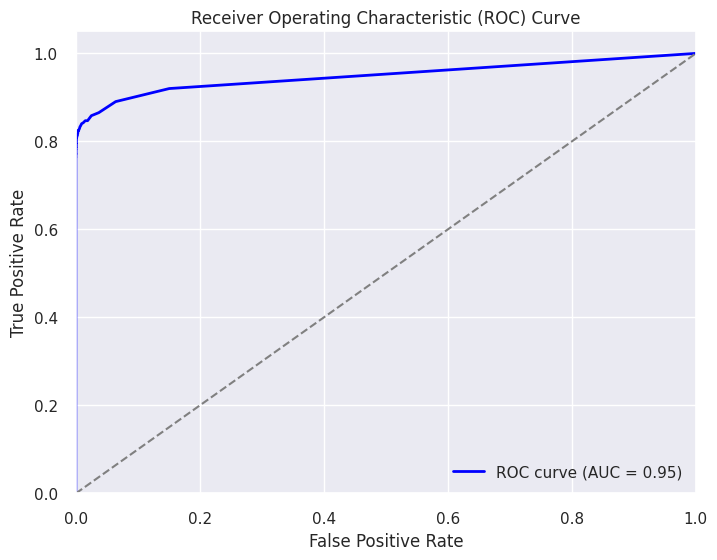

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show();


### Random Forest Model on Feature Engineering

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into features (X) and target variable (y)
X_FE = df_FE.drop(['Machine_failure'], axis=1)
y_FE = df_FE['Machine_failure']

# Split data into training and testing sets
X_train_FE, X_test_FE, y_train_FE, y_test_FE = train_test_split(X_FE, y_FE, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_clf_FE = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf_FE.fit(X_train_FE, y_train_FE)

# Make predictions on the test set
y_pred_FE = rf_clf_FE.predict(X_test_FE)

# Evaluate model performance
accuracy_FE = accuracy_score(y_test_FE, y_pred_FE)
print("Accuracy:", accuracy_FE)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_FE, y_pred_FE))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_FE, y_pred_FE))

Accuracy: 0.9961152239243568
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286

Confusion Matrix:
[[26843     5]
 [  101   337]]


### Feature Importance of Feature Engineering

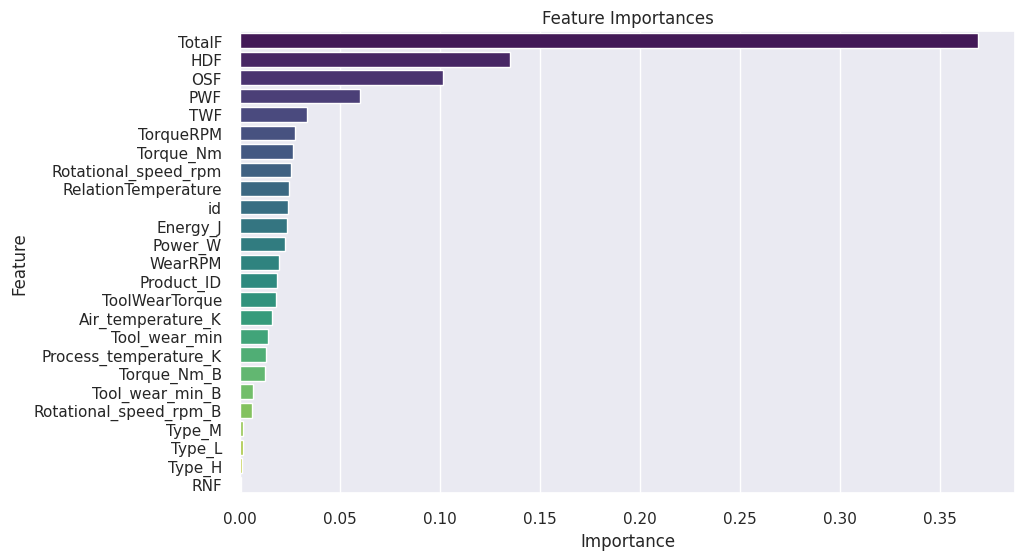

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
feature_importances_FE = rf_clf_FE.feature_importances_

# Get column names as feature labels
feature_labels_FE = X_FE.columns

# Create a DataFrame to store feature importances with corresponding labels
feature_importance_df_FE = pd.DataFrame({'Feature': feature_labels_FE, 'Importance': feature_importances_FE})

# Sort the DataFrame by feature importance in descending order
feature_importance_df_FE = feature_importance_df_FE.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_FE, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### ROC Curve of the Random Forest Model with Feature Engineering

<Figure size 1400x1400 with 0 Axes>

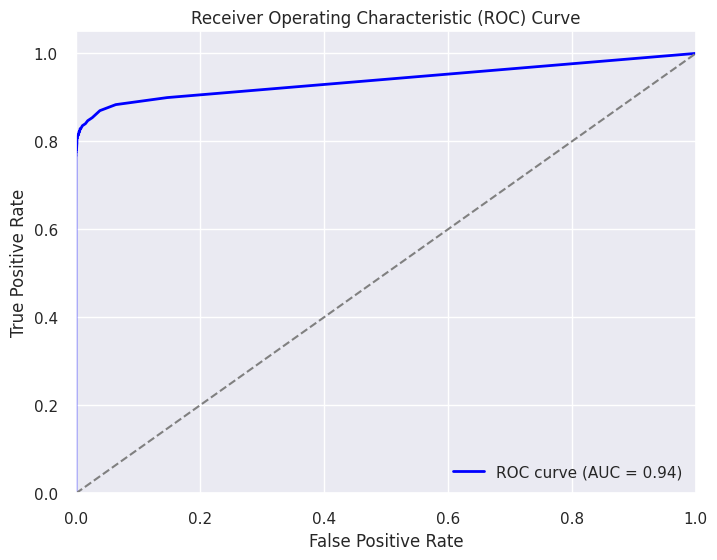

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities
y_pred_proba_FE = rf_clf_FE.predict_proba(X_test_FE)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_FE, tpr_FE, thresholds_FE = roc_curve(y_test_FE, y_pred_proba_FE)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) score
roc_auc_FE = roc_auc_score(y_test_FE, y_pred_proba_FE)

# Plot ROC curve
plt.figure()
plt.figure(figsize=(8, 6))
plt.plot(fpr_FE, tpr_FE, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_FE)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show();

# Gradient Boosting Classifier

In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into features (X) and target variable (y)
X = df.drop(['Machine_failure'], axis=1)
y = df['Machine_failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9961885215861614
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.87       438

    accuracy                           1.00     27286
   macro avg       0.99      0.89      0.93     27286
weighted avg       1.00      1.00      1.00     27286

Confusion Matrix:
[[26843     5]
 [   99   339]]


### Feature Importance of the Gradient Boosting Classifier

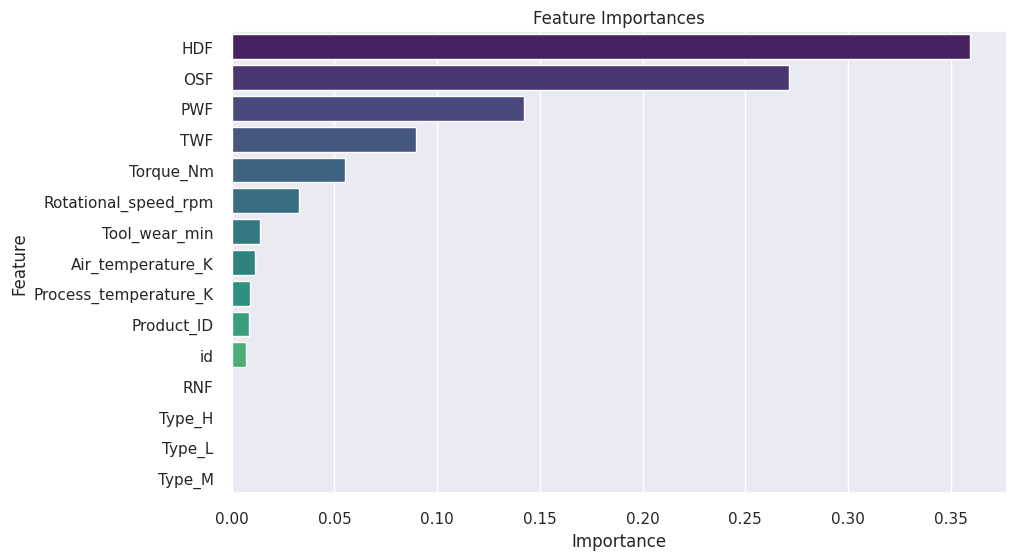

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
feature_importances = gb_clf.feature_importances_

# Get column names as feature labels
feature_labels = X.columns

# Create a DataFrame to store feature importances with corresponding labels
feature_importance_df = pd.DataFrame({'Feature': feature_labels, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### ROC Curve of Gradient Boosting Classifier

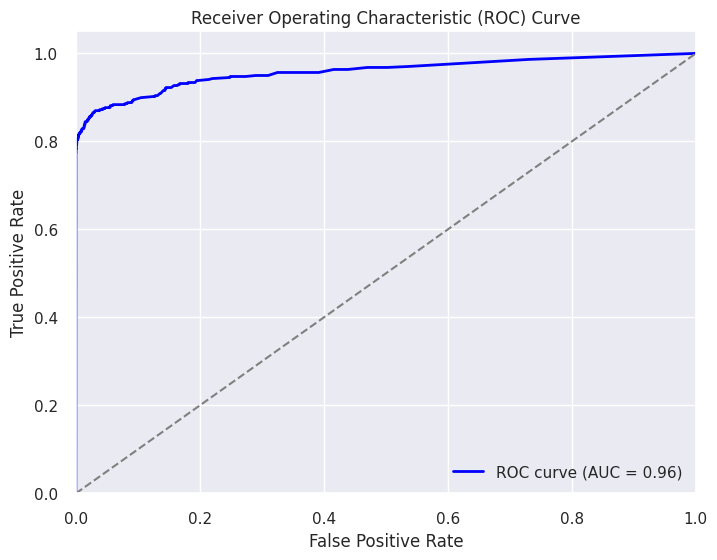

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities
y_pred_proba = gb_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))  # Specify the figure size
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Gradient Boosting Classifier for the Feature Engineering Dataset

In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into features (X) and target variable (y)
X_FE = df_FE.drop(['Machine_failure'], axis=1)
y_FE = df_FE['Machine_failure']

# Split data into training and testing sets
X_train_FE, X_test_FE, y_train_FE, y_test_FE = train_test_split(X_FE, y_FE, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Classifier
gb_clf_FE = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_clf_FE.fit(X_train_FE, y_train_FE)

# Make predictions on the test set
y_pred_FE = gb_clf_FE.predict(X_test_FE)

# Evaluate model performance
accuracy_FE = accuracy_score(y_test_FE, y_pred_FE)
print("Accuracy:", accuracy_FE)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_FE, y_pred_FE))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_FE, y_pred_FE))

Accuracy: 0.995895330938943
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.96      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.98      0.89      0.93     27286
weighted avg       1.00      1.00      1.00     27286

Confusion Matrix:
[[26835    13]
 [   99   339]]


### Feature Importance of Feature Engineering

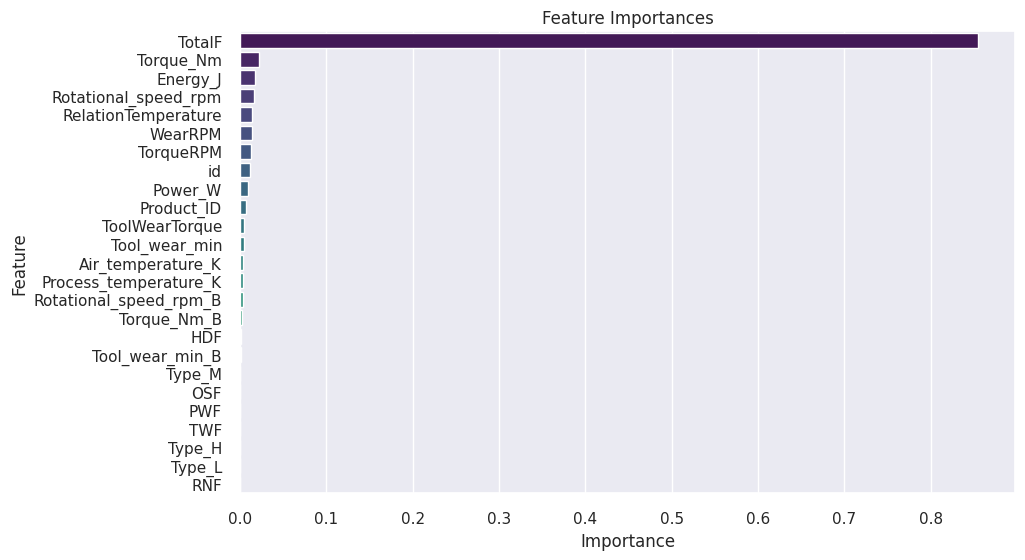

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
feature_importances_FE = gb_clf_FE.feature_importances_

# Get column names as feature labels
feature_labels_FE = X_FE.columns

# Create a DataFrame to store feature importances with corresponding labels
feature_importance_df_FE = pd.DataFrame({'Feature': feature_labels_FE, 'Importance': feature_importances_FE})

# Sort the DataFrame by feature importance in descending order
feature_importance_df_FE = feature_importance_df_FE.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_FE, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### ROC Curve of Gradient Boosting Classifier for the Feature Engineering Dataset

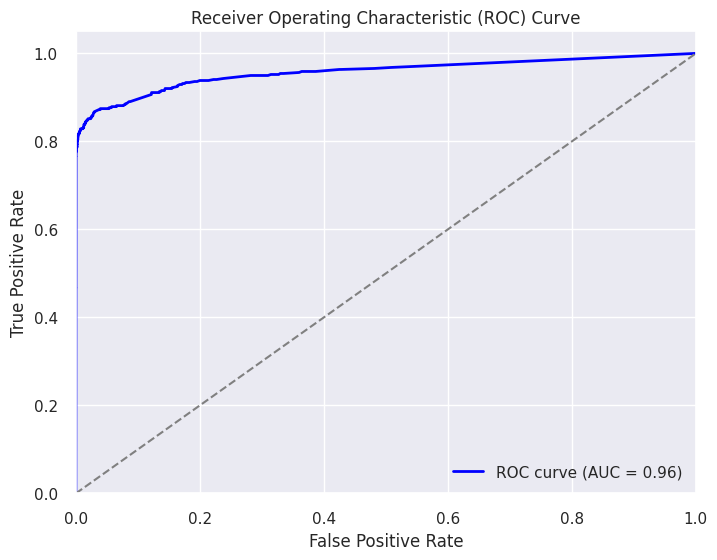

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities
y_pred_proba_FE = gb_clf_FE.predict_proba(X_test_FE)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_FE, tpr_FE, thresholds_FE = roc_curve(y_test_FE, y_pred_proba_FE)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) score
roc_auc_FE = roc_auc_score(y_test_FE, y_pred_proba_FE)

# Plot ROC curve
plt.figure(figsize=(8, 6))  # Specify the figure size
plt.plot(fpr_FE, tpr_FE, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_FE)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Logistic Regression

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into features (X) and target variable (y)
X = df.drop(['Machine_failure'], axis=1)
y = df['Machine_failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9842410027120135
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     26848
           1       0.83      0.02      0.04       438

    accuracy                           0.98     27286
   macro avg       0.91      0.51      0.52     27286
weighted avg       0.98      0.98      0.98     27286

Confusion Matrix:
[[26846     2]
 [  428    10]]


### Feature Importance of the Logistic Regression

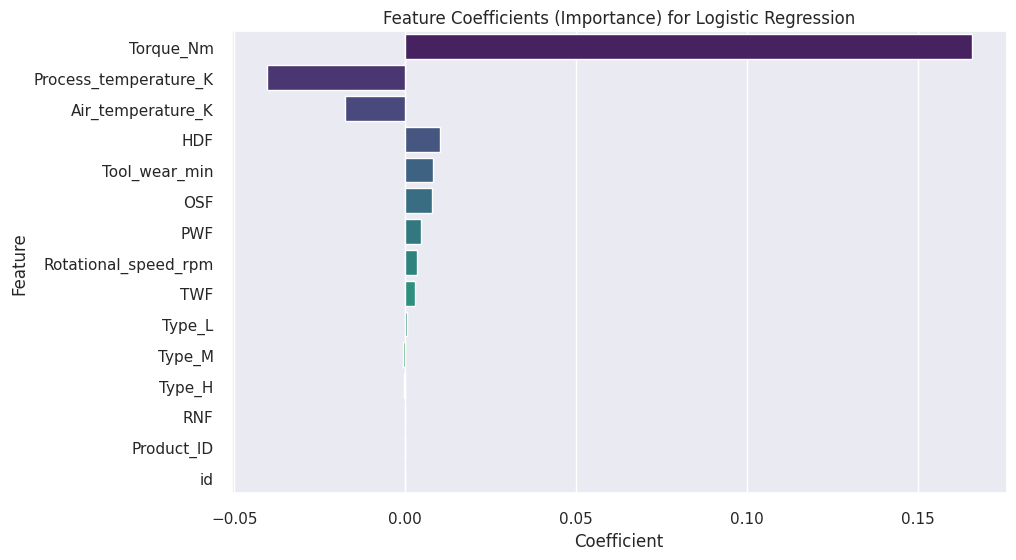

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature coefficients from the trained model
feature_coefficients = log_reg.coef_[0]

# Get column names as feature labels
feature_labels = X.columns

# Create a DataFrame to store feature coefficients with corresponding labels
feature_coefficients_df = pd.DataFrame({'Feature': feature_labels, 'Coefficient': feature_coefficients})

# Sort the DataFrame by absolute feature coefficient values
feature_coefficients_df['Absolute_Coefficient'] = feature_coefficients_df['Coefficient'].abs()
feature_coefficients_df = feature_coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Plot feature importances (coefficients)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_coefficients_df, palette='viridis')
plt.title('Feature Coefficients (Importance) for Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

### ROC Curve for Logistic Regression

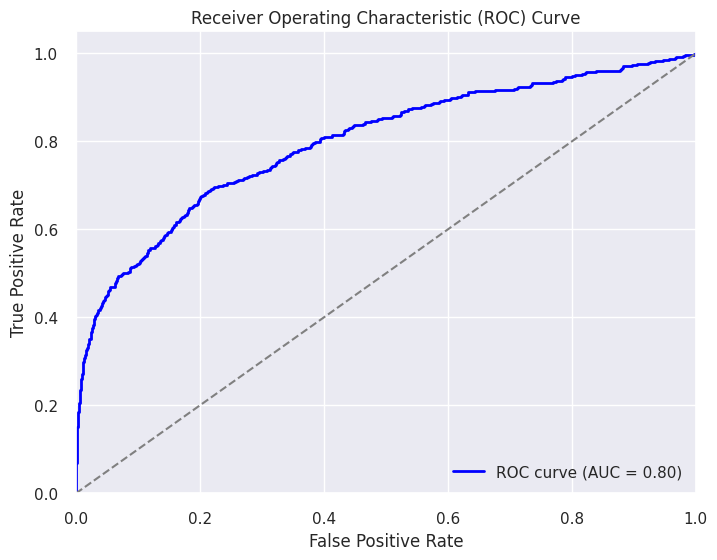

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))  # Specify the figure size
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Logistic Regression for the Feature Engineering Dataset

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into features (X) and target variable (y)
X_FE = df_FE.drop(['Machine_failure'], axis=1)
y_FE = df_FE['Machine_failure']

# Split data into training and testing sets
X_train_FE, X_test_FE, y_train_FE, y_test_FE = train_test_split(X_FE, y_FE, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier
log_reg_FE = LogisticRegression(random_state=42)

# Train the model
log_reg_FE.fit(X_train_FE, y_train_FE)

# Make predictions on the test set
y_pred_FE = log_reg_FE.predict(X_test_FE)

# Evaluate model performance
accuracy_FE = accuracy_score(y_test_FE, y_pred_FE)
print("Accuracy:", accuracy_FE)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_FE, y_pred_FE))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_FE, y_pred_FE))

Accuracy: 0.9839478120647951
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     26848
           1       0.00      0.00      0.00       438

    accuracy                           0.98     27286
   macro avg       0.49      0.50      0.50     27286
weighted avg       0.97      0.98      0.98     27286

Confusion Matrix:
[[26848     0]
 [  438     0]]


### Feature Importance of Feature Engineering

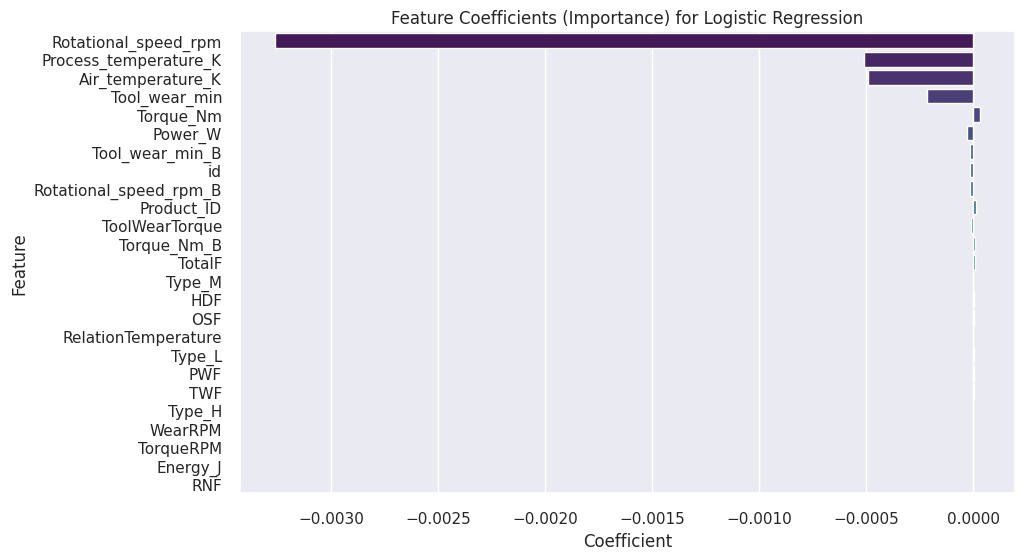

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature coefficients from the trained model
feature_coefficients_FE = log_reg_FE.coef_[0]

# Get column names as feature labels
feature_labels_FE = X_FE.columns

# Create a DataFrame to store feature coefficients with corresponding labels
feature_coefficients_df_FE = pd.DataFrame({'Feature': feature_labels_FE, 'Coefficient': feature_coefficients_FE})

# Sort the DataFrame by absolute feature coefficient values
feature_coefficients_df_FE['Absolute_Coefficient'] = feature_coefficients_df_FE['Coefficient'].abs()
feature_coefficients_df_FE = feature_coefficients_df_FE.sort_values(by='Absolute_Coefficient', ascending=False)

# Plot feature importances (coefficients)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_coefficients_df_FE, palette='viridis')
plt.title('Feature Coefficients (Importance) for Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


### ROC Curve for Logistic Regression for the Feature Engineering Dataset

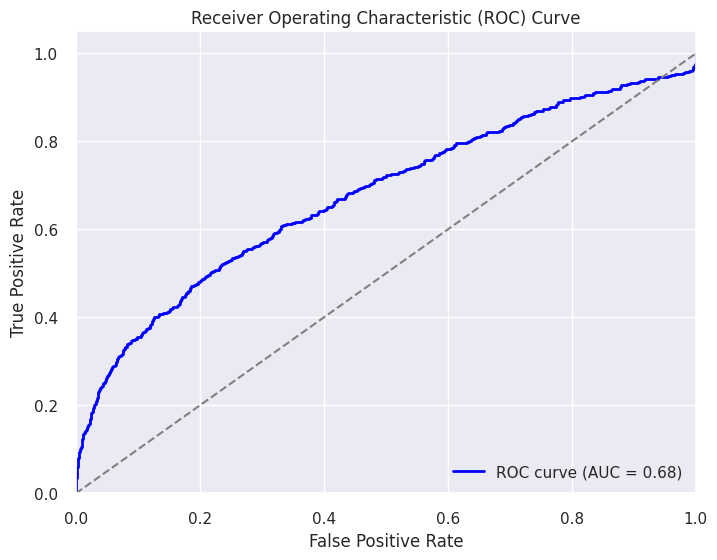

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities
y_pred_proba_FE = log_reg_FE.predict_proba(X_test_FE)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_FE, tpr_FE, thresholds_FE = roc_curve(y_test_FE, y_pred_proba_FE)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) score
roc_auc_FE = roc_auc_score(y_test_FE, y_pred_proba_FE)

# Plot ROC curve
plt.figure(figsize=(8, 6))  # Specify the figure size
plt.plot(fpr_FE, tpr_FE, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_FE)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Responsible AI Analysis

### LIME

In [19]:
!pip install lime

In [20]:
!pip install -q shap
!pip install lime anchor-exp pdpbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.3/427.3 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 15.1 MB/s eta 0:00:00
  Created wheel for anchor-exp: filename=anchor_exp-0.0.2.0-py3-none-any.whl size=433498 sha256=6295d0082d889a3fbb8e3e4f216a0f5aa1a6bd8321aabdb47436f1b735162fdc
  Stored in directory: /root/.cache/pip/wheels/e9/53/45/7e4602020c5e5069ccef79f1389adb8efc4ca3c4d9891388bb
Successfully built anchor-exp
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling S

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import lime
import lime.lime_tabular

# Load your data into a pandas DataFrame
# Assuming your DataFrame is named df
df = df.copy()
# Drop non-numeric columns (you may want to handle them differently)
df_numeric = df.drop(['Product_ID'], axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_numeric.drop('Machine_failure', axis=1), df_numeric['Machine_failure'], test_size=0.2, random_state=42)

# Train a classifier (Random Forest as an example)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# LIME
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Not Failed', 'Failed'], discretize_continuous=True)
idx = 0  # index of the instance you want to explain
exp = explainer.explain_instance(X_test.values[idx], clf.predict_proba, num_features=5, top_labels=1)
exp.show_in_notebook(show_table=True)

# Causal Analysis

In [ ]:
!pip install econml

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from econml.dml import LinearDML
import pandas as pd

In [ ]:
# Import necessary packages
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from econml.dml import LinearDML
import pandas as pd

# Prepare the outcome
y = df['Machine_failure'].values

# Standardize the features
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Initialize the models for treatment and outcome
model_y = Pipeline([('model', GradientBoostingRegressor())])
model_t = Pipeline([('model', RandomForestRegressor())])

# Loop through each predictor
ate_results = []
for feature in df.columns[:-1]:  # Exclude the outcome column
    T = df[feature].values  # Current feature as treatment indicator
    X = df.drop(columns=[feature, 'Machine_failure']).values  # Other features as confounders

    # Initialize and fit the LinearDML estimator
    estimator = LinearDML(model_y=model_y, model_t=model_t)
    estimator.fit(Y=y, T=T, X=X)

    # Estimate the ATE for this feature
    ate = estimator.ate(X)
    ate_results.append({'Feature': feature, 'ATE': ate})

# Display ATE estimates for each feature
ate_df = pd.DataFrame(ate_results)
print(ate_df)


                  Feature           ATE
0                      id  7.452029e-05
1              Product_ID -2.628533e-03
2       Air_temperature_K  4.140178e-03
3   Process_temperature_K -2.761611e-03
4    Rotational_speed_rpm  9.970440e-06
5               Torque_Nm  3.530912e-03
6           Tool_wear_min  9.503745e-04
7         Machine_failure  1.122303e-01
8                     TWF  3.345228e-02
9                     HDF  5.083178e-02
10                    PWF  3.856186e-02
11                    OSF  5.058245e-02
12                    RNF -5.053779e-05
13                 Type_H -1.126026e+11
14                 Type_L -1.758114e+09


# Conclusion

We've performed extensive data cleaning on a machine failure prediction dataset, handling duplicates, outliers, and encoding categorical variables. After preprocessing, we applied feature engineering and assessed model performance using Random Forest, Gradient Boosting and Logistic Regression.

Overall, Logistic Regression appears to be the best model in predicting machine failure. Random Forest and Gradient Boosting models also demonstrated high accuracy and precision in predicting instances of no failure, with relatively good performance in identifying instances of failure. However, Feature engineering had varying impacts across models, with marginal improvements observed in Random Forest but a decline in performance in Gradient Boosting and Logistic Regression. Additionally, Lime Analysis reveals specific influential factors on predictions, such as "Energy_J" and "id", while ATE analysis highlights the significance of temperature and failure triggers in predicting machine failures.

## Summary Statistics

| Model Name                                 | Accuracy | Confusion Matrix    | Top Features                                 | AUC  |
|--------------------------------------------|----------|---------------------|----------------------------------------------|------|
| PyCaret Best Model: Extra Trees Classifier | 99.72%   | [[40283, 2], [112, 532]]                   | HDF, Product_ID, OSF, PWF, Torque                                             | 0.99   |
| Random Forest                              | 99.6%    | [[26842, 6], [102, 336]] | HDF, OSF, PWF, TWF, Torque                 | 0.95 |
| Random Forest Feature Engineering          | 99.61%   | [[26843, 5], [101, 337]] | TotalF, HDF, OSF, PWF, TWF                 | 0.94 |
| Gradient Boosting Classifier              | 99.61%   | [[26843, 5], [99, 339]]  | HDF, OSF, PWF, TWF, Torque                 | 0.96 |
| Gradient Boosting Classifier Feature Engineering | 99.58%   | [[26835, 13], [99, 339]] | TotalF, Torque, Energy J, Rotational Speed, Relation Temperature | 0.96 |
| Logistic Regression                       | 98.42%   | [[26846, 2], [428, 10]]  | Torque, Process Temperature, Air temperature, HDF, Tool wear minimum | 0.80 |
| Logistic Regression Feature Engineering   | 98.3%    | [[26848, 0], [438, 0]]    | Rotational Speed, Process temperature, air temperature, tool wear minimum, torque | 0.68 |
